In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [23]:
df = pd.read_parquet('/Users/dianaterraza/Desktop/portfolio_project/data/processed_data.parquet')

In [24]:
df.head()

,SGD_USD,CNY_USD
DATE,,
2000-01-03,1.6563,8.2798
2000-01-04,1.6535,8.2799
2000-01-05,1.6560,8.2798
2000-01-06,1.6655,8.2797
2000-01-07,1.6625,8.2794


### Feature Engineering

In [25]:
# Create lag features
for i in range(1, 13):
    df[f'lag_{i}'] = df['SGD_USD'].shift(i)

# Rolling mean & std
df['rolling_mean_3'] = df['SGD_USD'].rolling(window=3).mean()
df['rolling_std_3'] = df['SGD_USD'].rolling(window=3).std()

# Drop rows with NaN values (due to shifting)
df.dropna(inplace=True)


### Train test split

In [26]:
# Define features and target
features = df.drop(columns=['SGD_USD'])
target = df['SGD_USD']

# Train/test split (last 12 months for testing)
X_train, X_test = features[:-12], features[-12:]
y_train, y_test = target[:-12], target[-12:]


### Train Random Forest Model

In [27]:
rf = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Predictions
rf_pred = rf.predict(X_test)


### Evaluate Performance

In [28]:
mse = mean_squared_error(y_test, rf_pred)
mae = mean_absolute_error(y_test, rf_pred)

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')


MSE: 0.0000
MAE: 0.0043


### Plot Predictions vs actual

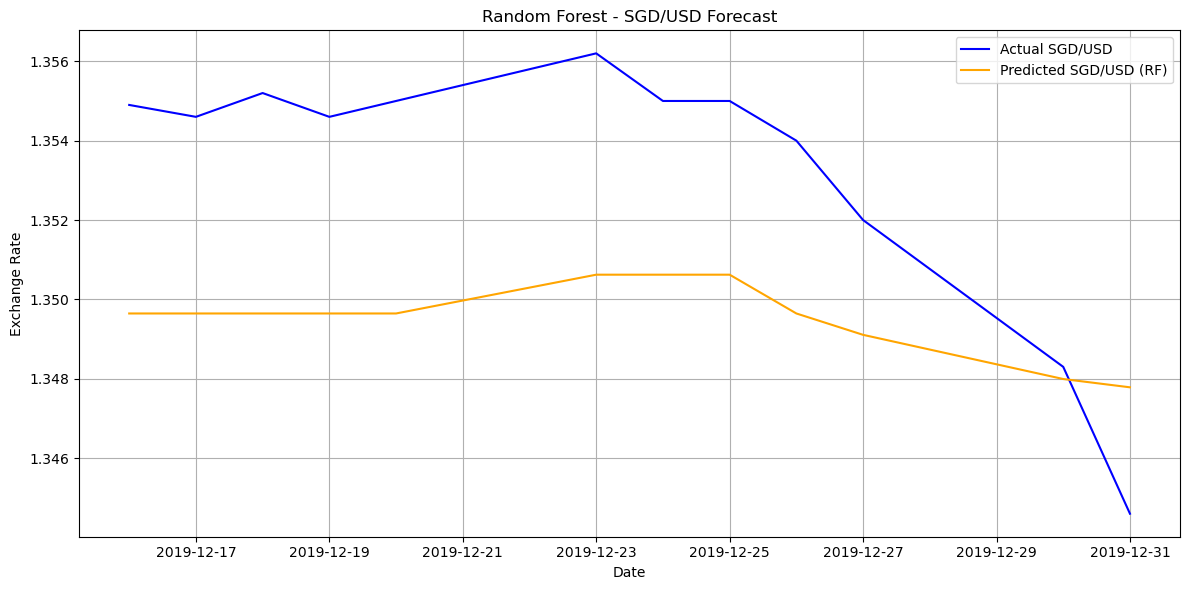

In [29]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual SGD/USD', color='blue')
plt.plot(y_test.index, rf_pred, label='Predicted SGD/USD (RF)', color='orange')
plt.title('Random Forest - SGD/USD Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
